In [10]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import pandas as pd
import numpy as np

In [14]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

##Data Example

In [15]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [17]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [18]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [19]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [20]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [21]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data,
                         batch_size = 100,
                         shuffle = True,
                         num_workers = 1),

    'test' : DataLoader(test_data,
                        batch_size = 100,
                        shuffle = True,
                        num_workers = 1),

}

In [22]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7a65c470bf40>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7a65c4708df0>}

In [23]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size= 5)
    self.conv2_drop = nn.Dropout2d() #randomly deactivates nodes in network during training. Irrelevant during testing and evaluation.
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training = self.training)
    x = self.fc2(x)
    return F.softmax(x)


In [28]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f'Train Epoch: {epoch} [{batch_idx * len(data)} / {len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim=1, keepdim = True)
      correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accurary {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n)')

In [29]:
for epoch in range(1, 11):
  train(epoch)
  test()


<ipython-input-23-e780c4099691>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0 / 60000 (0%)]	2.304431
Train Epoch: 1 [2000 / 60000 (3%)]	2.290511
Train Epoch: 1 [4000 / 60000 (7%)]	2.139374
Train Epoch: 1 [6000 / 60000 (10%)]	1.998302
Train Epoch: 1 [8000 / 60000 (13%)]	1.978837
Train Epoch: 1 [10000 / 60000 (17%)]	1.872200
Train Epoch: 1 [12000 / 60000 (20%)]	1.798493
Train Epoch: 1 [14000 / 60000 (23%)]	1.729657
Train Epoch: 1 [16000 / 60000 (27%)]	1.741107
Train Epoch: 1 [18000 / 60000 (30%)]	1.698750
Train Epoch: 1 [20000 / 60000 (33%)]	1.762203
Train Epoch: 1 [22000 / 60000 (37%)]	1.658671
Train Epoch: 1 [24000 / 60000 (40%)]	1.627796
Train Epoch: 1 [26000 / 60000 (43%)]	1.623584
Train Epoch: 1 [28000 / 60000 (47%)]	1.666889
Train Epoch: 1 [30000 / 60000 (50%)]	1.662208
Train Epoch: 1 [32000 / 60000 (53%)]	1.595821
Train Epoch: 1 [34000 / 60000 (57%)]	1.597839
Train Epoch: 1 [36000 / 60000 (60%)]	1.606019
Train Epoch: 1 [38000 / 60000 (63%)]	1.608866
Train Epoch: 1 [40000 / 60000 (67%)]	1.612641
Train Epoch: 1 [42000 / 60000 (70%)]	1.548871

In [30]:
device

device(type='cpu')

<ipython-input-23-e780c4099691>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Prediction: 0


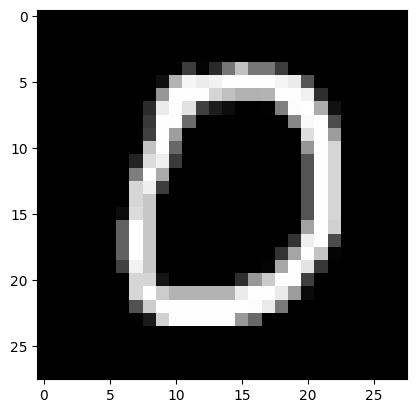

In [33]:
import matplotlib.pyplot as plt
model.eval()
data, target = test_data[10]

data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f'Prediction: {prediction}')
image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()